## Notebook to compare cell-type fractions from single-cell modalities and the SCADEN estimated cell-type fractions for the RNAB

this is to get some idea on estimated cell-type fraction accuracy as these values are used in various analyses for the bulk modalities

In [1]:
!date

Wed Oct 16 08:12:49 PM UTC 2024


#### import libraries

In [2]:
from pandas import read_csv, DataFrame
from scipy.stats import linregress
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
from seaborn import scatterplot, lmplot

%matplotlib inline
# for white background of figures (only for docs rendering)
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'

#### set notebook variables

In [3]:
# naming

# directories
wrk_dir = '/labshare/raph/datasets/foundin_qtl'
info_dir = f'{wrk_dir}/sample_info'

# in files
bulk_fracs_file = f'{info_dir}/foundin_RNAB_sample_info.csv'
scrn_fracs_file = f'{info_dir}/SCRN_integratedAfterBroadCellType.proportions.txt'
scat_fracs_file = f'{info_dir}/SCAT_integratedAfterBroadCellType.proportions.txt'

# variables
DEBUG = False
dpi_value = 50
cell_types = ['DopaminergicNeurons',
              'EarlyneuronProgenitor',
              'Ependymal-likeCells',
              'ImmatureDopaminergicNeurons',
              'LateneuronProgenitor',
              'Neuroepithelial-likeCells',
              'ProliferatingFloorPlateProgenitors',
              'DAn']
icc_types = ['TH_Pel-Freez_ICC', 'MAP2_Santa_Cruz_ICC']

### load data

#### load the bulk fractions estimated by SCADEN

In [4]:
bulk_df = read_csv(bulk_fracs_file)
# modify sampleid to be consistent with others
bulk_df.sampleid = bulk_df.PPMI_ID + '_' + bulk_df.cdi.astype('str') + '_' + bulk_df.day
bulk_df = bulk_df[['sampleid'] + cell_types + icc_types]
print(f'bulk info shape {bulk_df.shape}')
if DEBUG:
    display(bulk_df.head())

bulk info shape (305, 11)


In [5]:
print(bulk_df.sampleid.nunique())
print(bulk_df.index.nunique())
# with this ID formatting the batch control sample will be duplicate, keep first
bulk_df = bulk_df.drop_duplicates(subset=['sampleid'], keep='first')
print(f'bulk info shape {bulk_df.shape}')
if DEBUG:
    display(bulk_df.head())

288
305
bulk info shape (288, 11)


#### load the SCRN cell-type proportions

In [6]:
scrn_df = read_csv(scrn_fracs_file, sep='\t', index_col=0)
# strip the spaces from cell-types names
scrn_df.columns = scrn_df.columns.str.replace(' ', '')
# create combined DAn fraction
scrn_df['DAn'] = scrn_df.DopaminergicNeurons + scrn_df.ImmatureDopaminergicNeurons
# add modality to col name
scrn_df.columns = [f'SCRN_{x}' for x in scrn_df.columns]
# create sampleid column
scrn_df.insert(0, 'sampleid', scrn_df.index.str.replace('SCRN_', ''))
print(f'bulk info shape {scrn_df.shape}')
if DEBUG:
    display(scrn_df.head())

bulk info shape (83, 9)


In [7]:
print(scrn_df.sampleid.nunique())
print(scrn_df.index.nunique())

83
83


#### load the SCAT cell-type proportions

In [8]:
scat_df = read_csv(scat_fracs_file, sep='\t', index_col=0)
# strip the spaces from cell-types names
scat_df.columns = scat_df.columns.str.replace(' ', '')
# create combined DAn fraction
scat_df['DAn'] = scat_df.DopaminergicNeurons + scat_df.ImmatureDopaminergicNeurons
# add modality to col name
scat_df.columns = [f'SCAT_{x}' for x in scat_df.columns]
# create sampleid column
scat_df.insert(0, 'sampleid', scat_df.index.str.replace('SCAT_', ''))
print(f'bulk info shape {scat_df.shape}')
if DEBUG:
    display(scat_df.head())

bulk info shape (29, 9)


In [9]:
print(scat_df.sampleid.nunique())
print(scat_df.index.nunique())

29
29


### merge and plot the single-cell modalities

In [10]:
merged = scrn_df.merge(scat_df, how='inner', left_on='sampleid', right_on='sampleid')
print(f'merged shape is {merged.shape}')
if DEBUG:
    display(merged.head())

merged shape is (29, 17)


#### visualize

DopaminergicNeurons
LinregressResult(slope=0.490200914787829, intercept=0.10721257347131374, rvalue=0.5099264114252886, pvalue=0.00471568970511601, stderr=0.1591450989015398, intercept_stderr=0.04345710516991699)
R-squared: 0.260


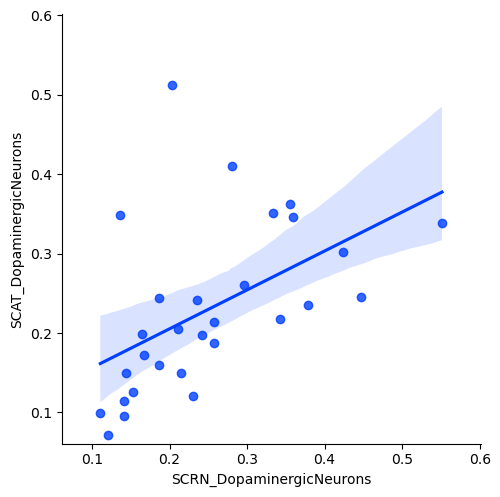

EarlyneuronProgenitor
LinregressResult(slope=0.3682932900464642, intercept=0.03600689517878726, rvalue=0.6206106237530817, pvalue=0.00032833151727026217, stderr=0.08955186653000079, intercept_stderr=0.025710146701851944)
R-squared: 0.385


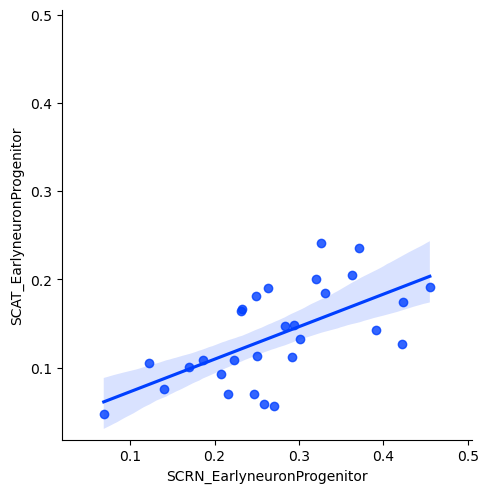

Ependymal-likeCells
LinregressResult(slope=1.4351405307539147, intercept=0.010155691381029387, rvalue=0.6104196253471587, pvalue=0.0004373955645343101, stderr=0.358386896497698, intercept_stderr=0.006289250612820265)
R-squared: 0.373


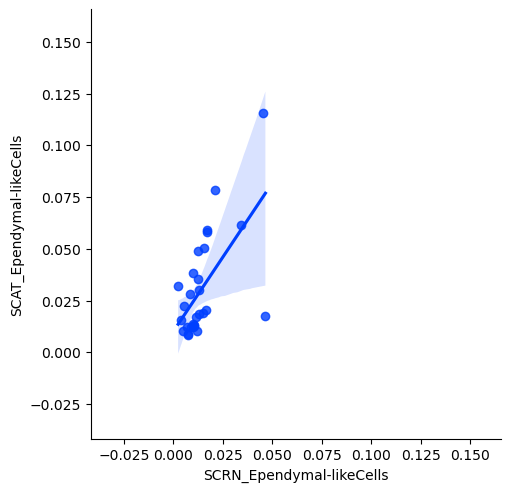

ImmatureDopaminergicNeurons
LinregressResult(slope=1.4470438200757831, intercept=0.13419328812704745, rvalue=0.9132337040007446, pvalue=4.901494417981367e-12, stderr=0.12424456788434037, intercept_stderr=0.02037212814908129)
R-squared: 0.834


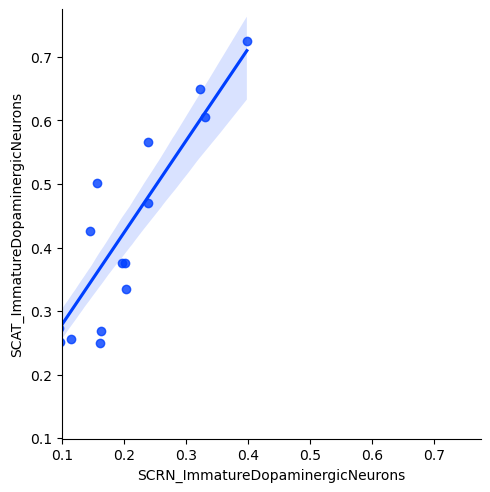

LateneuronProgenitor
LinregressResult(slope=0.2982873292845067, intercept=0.004258149479164322, rvalue=0.5638449940107761, pvalue=0.0014453210945669297, stderr=0.0840834412308699, intercept_stderr=0.022599273751343556)
R-squared: 0.318


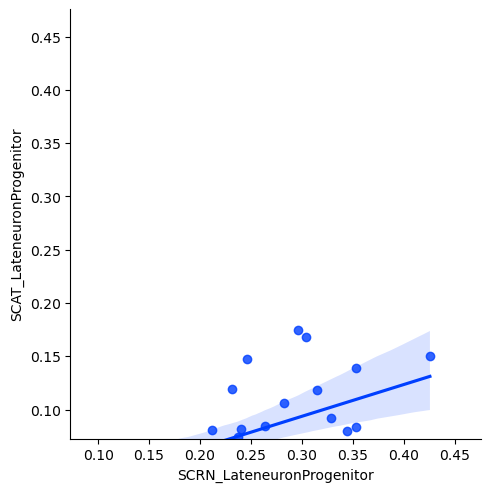

Neuroepithelial-likeCells
LinregressResult(slope=0.5565164697966599, intercept=0.04043191751594423, rvalue=0.42588529246631296, pvalue=0.021250397937356724, stderr=0.22753338515667113, intercept_stderr=0.007237178357553699)
R-squared: 0.181


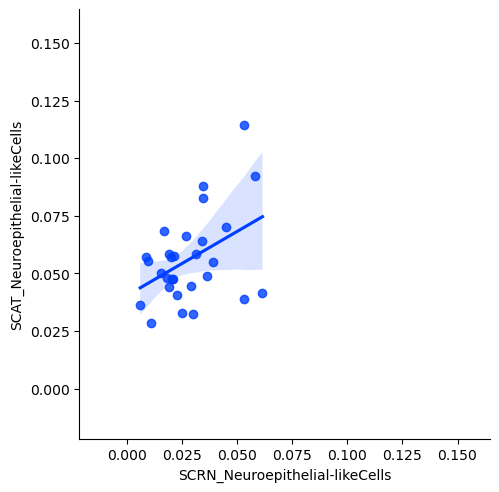

ProliferatingFloorPlateProgenitors
LinregressResult(slope=1.1095324247803415, intercept=0.09029317793268787, rvalue=0.2676375581579681, pvalue=0.16042804464233956, stderr=0.7687261213585824, intercept_stderr=0.03707129206219097)
R-squared: 0.072


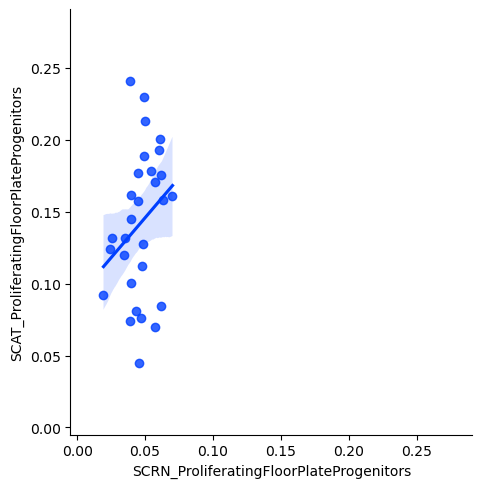

DAn
LinregressResult(slope=0.6298678312534047, intercept=0.313658345868405, rvalue=0.47467600190439446, pvalue=0.00927334298177049, stderr=0.22476681811243918, intercept_stderr=0.08878372337301572)
R-squared: 0.225


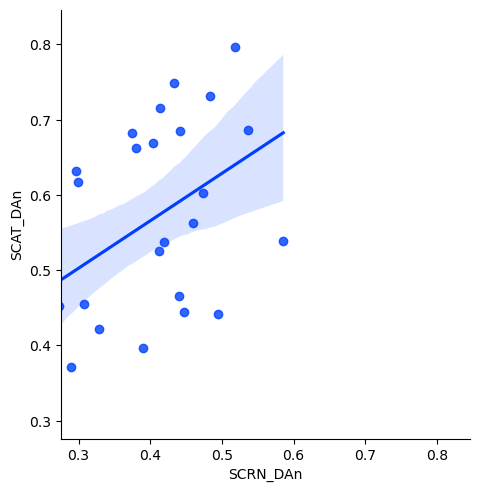

In [11]:
for cell_type in cell_types:
    print(cell_type)
    results = linregress(merged[f'SCRN_{cell_type}'], merged[f'SCAT_{cell_type}'])
    print(results)
    print(f"R-squared: {results.rvalue**2:.3f}")
    if merged[f'SCRN_{cell_type}'].max() > merged[f'SCAT_{cell_type}'].max():
        max_value = merged[f'SCRN_{cell_type}'].max() + 0.05
    else:
        max_value = merged[f'SCAT_{cell_type}'].max() + 0.05
    if merged[f'SCRN_{cell_type}'].min() > merged[f'SCAT_{cell_type}'].min():
        min_value = merged[f'SCRN_{cell_type}'].min() - 0.05
    else:
        min_value = merged[f'SCAT_{cell_type}'].min() - 0.05 
    with rc_context({'figure.figsize': (9, 9), 'figure.dpi': dpi_value}):
        plt.style.use('seaborn-v0_8-bright')
        # scatterplot(data=merged, x='SCRN_DopaminergicNeurons', y='SCAT_DopaminergicNeurons')
        lmplot(data=merged, x=f'SCRN_{cell_type}', y=f'SCAT_{cell_type}')
        plt.xlim([min_value, max_value])
        plt.ylim([min_value, max_value])
        plt.show()

### merge and plot the SCRN and RNAB modalities

In [12]:
merged = bulk_df.merge(scrn_df, how='inner', left_on='sampleid', right_on='sampleid')
print(f'merged shape is {merged.shape}')
if DEBUG:
    display(merged.head())

merged shape is (68, 19)


#### visualize

DopaminergicNeurons
LinregressResult(slope=0.7444769262548306, intercept=0.15932019068585004, rvalue=0.3689828054258619, pvalue=0.001959203558697836, stderr=0.23083025919592148, intercept_stderr=0.05837223235865832)
R-squared: 0.136


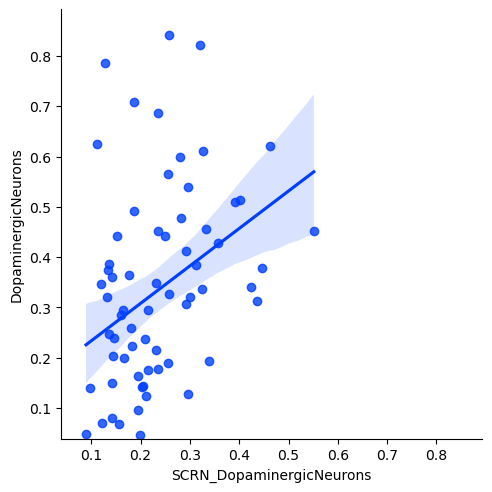

EarlyneuronProgenitor
LinregressResult(slope=0.6439240759626854, intercept=-0.030027857981737738, rvalue=0.4694133247450669, pvalue=5.387666046621118e-05, stderr=0.1490930636077885, intercept_stderr=0.04684547384299912)
R-squared: 0.220


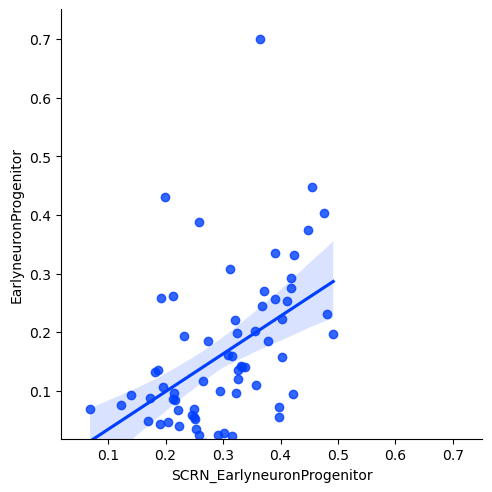

Ependymal-likeCells
LinregressResult(slope=0.046953875665008735, intercept=0.015516020484926967, rvalue=0.08730247616451131, pvalue=0.4789943616217759, stderr=0.06594950507870481, intercept_stderr=0.001269477790917208)
R-squared: 0.008


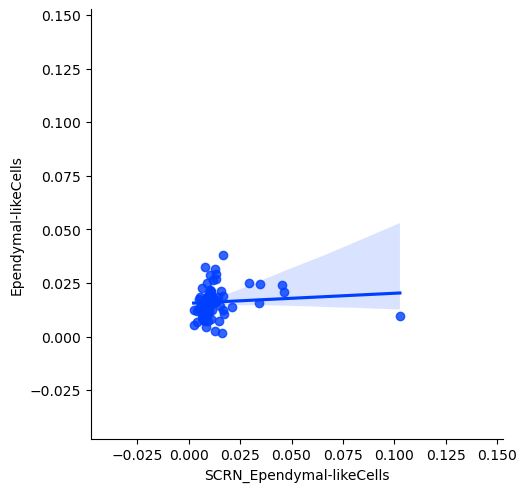

ImmatureDopaminergicNeurons
LinregressResult(slope=0.7401180472083557, intercept=0.06263357693585861, rvalue=0.604891070376621, pvalue=4.674646190336237e-08, stderr=0.11993144214614715, intercept_stderr=0.017377787779809716)
R-squared: 0.366


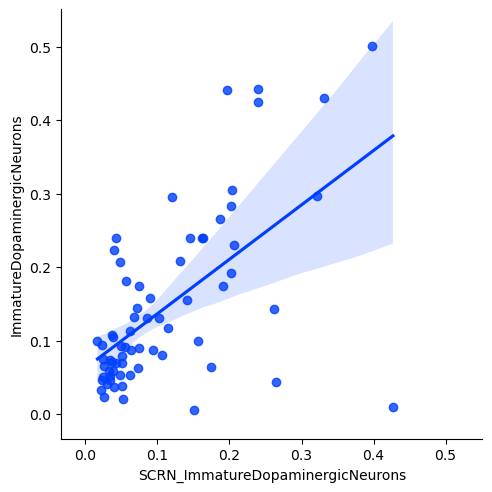

LateneuronProgenitor
LinregressResult(slope=0.9670421244036856, intercept=-0.05282362633658144, rvalue=0.47419945574779027, pvalue=4.407667218971304e-05, stderr=0.2210044468957046, intercept_stderr=0.06438653002316876)
R-squared: 0.225


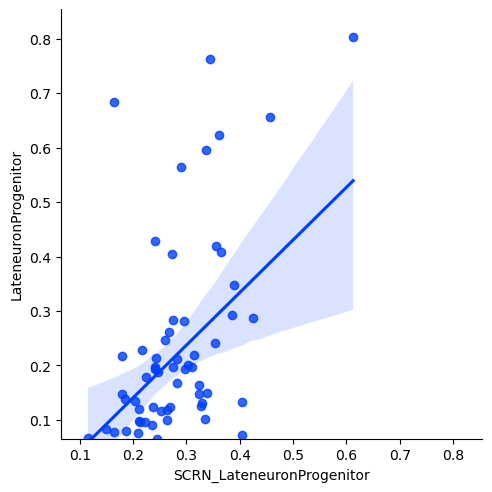

Neuroepithelial-likeCells
LinregressResult(slope=0.9354433224534761, intercept=0.059530216787808114, rvalue=0.338681848288078, pvalue=0.004727003291734458, stderr=0.3198876689519462, intercept_stderr=0.008723519176433537)
R-squared: 0.115


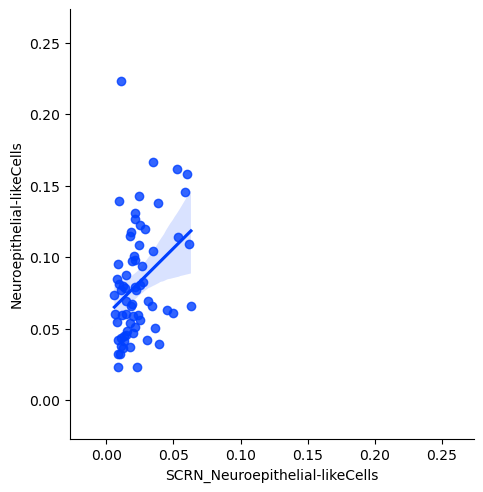

ProliferatingFloorPlateProgenitors
LinregressResult(slope=0.4638649324338259, intercept=0.027696112971780158, rvalue=0.24452559626118894, pvalue=0.04446868640720024, stderr=0.2264159622534404, intercept_stderr=0.010497537821303953)
R-squared: 0.060


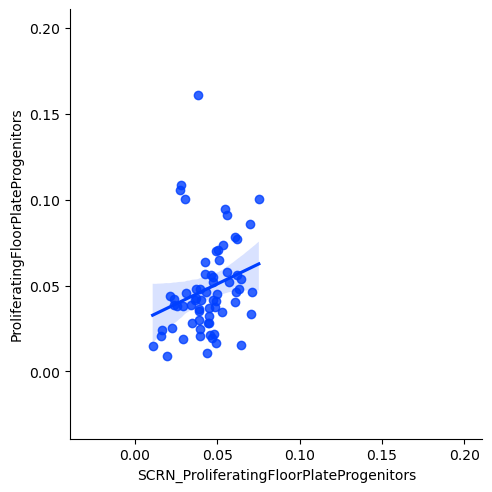

DAn
LinregressResult(slope=0.9804283669073481, intercept=0.14066682133736846, rvalue=0.4509740432619663, pvalue=0.00011362683491450338, stderr=0.23884635337122345, intercept_stderr=0.085630587149812)
R-squared: 0.203


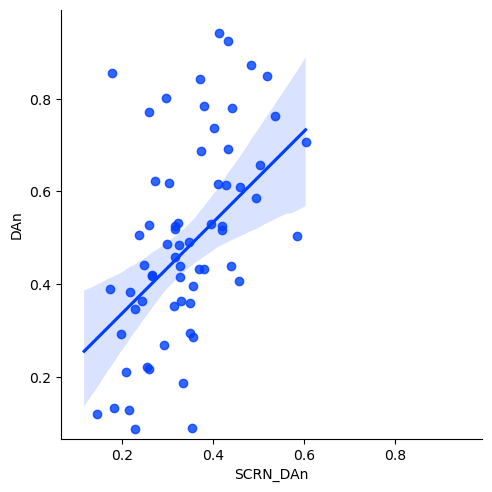

In [13]:
for cell_type in cell_types:
    print(cell_type)
    results = linregress(merged[f'SCRN_{cell_type}'], merged[cell_type])
    print(results)
    print(f"R-squared: {results.rvalue**2:.3f}")    
    if merged[f'SCRN_{cell_type}'].max() > merged[cell_type].max():
        max_value = merged[f'SCRN_{cell_type}'].max() + 0.05
    else:
        max_value = merged[cell_type].max() + 0.05
    if merged[f'SCRN_{cell_type}'].min() > merged[cell_type].min():
        min_value = merged[f'SCRN_{cell_type}'].min() - 0.05
    else:
        min_value = merged[cell_type].min() - 0.05 
    with rc_context({'figure.figsize': (9, 9), 'figure.dpi': dpi_value}):
        plt.style.use('seaborn-v0_8-bright')
        lmplot(data=merged, x=f'SCRN_{cell_type}', y=cell_type)
        plt.xlim([min_value, max_value])
        plt.ylim([min_value, max_value])
        plt.show()

### compare SCRN fractions with TH ICC values

In [14]:
def compare_ICC(df: DataFrame, icc_type: str):
    df[icc_type].fillna(0, inplace=True)
    for cell_type in cell_types:
        print(cell_type)
        results = linregress(df[f'SCRN_{cell_type}'], df[icc_type])
        print(results)
        print(f'R-squared: {results.rvalue**2:.3f}')    
        with rc_context({'figure.figsize': (9, 9), 'figure.dpi': dpi_value}):
            plt.style.use('seaborn-v0_8-bright')
            lmplot(data=df, x=f'SCRN_{cell_type}', y=icc_type)
            plt.show()    

/tmp/ipykernel_137185/763400554.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[icc_type].fillna(0, inplace=True)


DopaminergicNeurons
LinregressResult(slope=44.0615827164964, intercept=4.933860448202113, rvalue=0.6243461222246994, pvalue=1.2764301336644428e-08, stderr=6.785719961735234, intercept_stderr=1.7159692308407448)
R-squared: 0.390


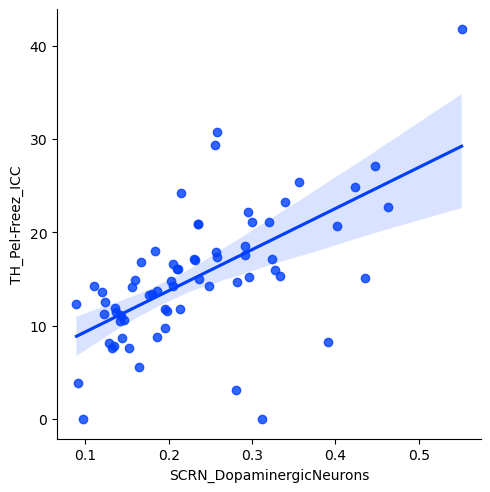

EarlyneuronProgenitor
LinregressResult(slope=-18.016664536811138, intercept=20.575966881107643, rvalue=-0.24202726145584444, pvalue=0.04675901999140549, stderr=8.890588201067343, intercept_stderr=2.793448648406605)
R-squared: 0.059


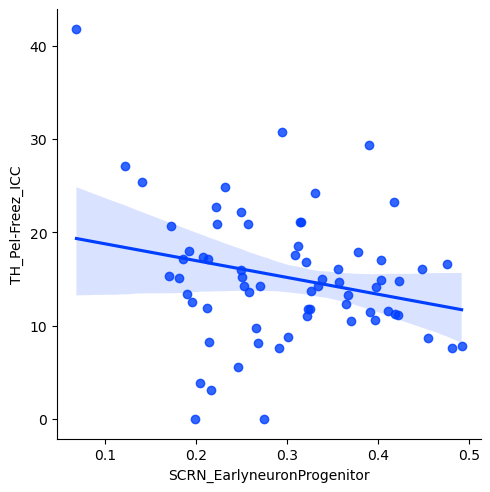

Ependymal-likeCells
LinregressResult(slope=-114.77324245842055, intercept=16.728270443339895, rvalue=-0.22383984525060963, pvalue=0.06651037629840356, stderr=61.513332073294414, intercept_stderr=1.1840848361055818)
R-squared: 0.050


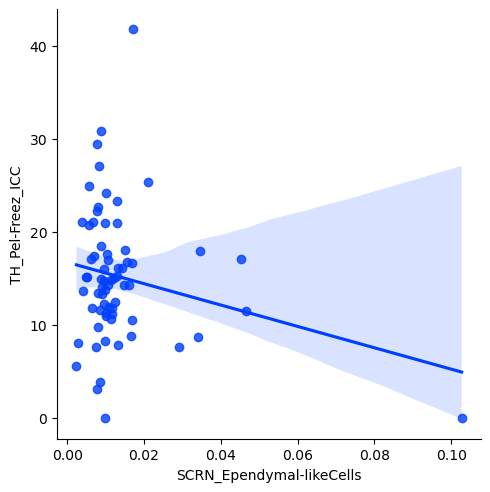

ImmatureDopaminergicNeurons
LinregressResult(slope=-10.793358037304332, intercept=16.36388579641676, rvalue=-0.14487658720406865, pvalue=0.23849182844106964, stderr=9.073610755406774, intercept_stderr=1.3147451517502105)
R-squared: 0.021


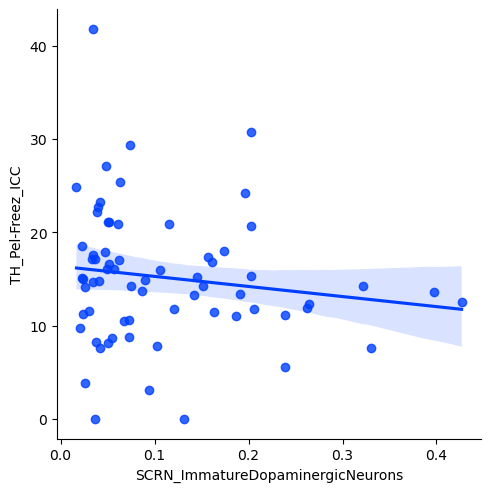

LateneuronProgenitor
LinregressResult(slope=-16.72968394764329, intercept=19.811767830962882, rvalue=-0.21443532850940253, pvalue=0.07909105271755348, stderr=9.379886850266232, intercept_stderr=2.732697802155992)
R-squared: 0.046


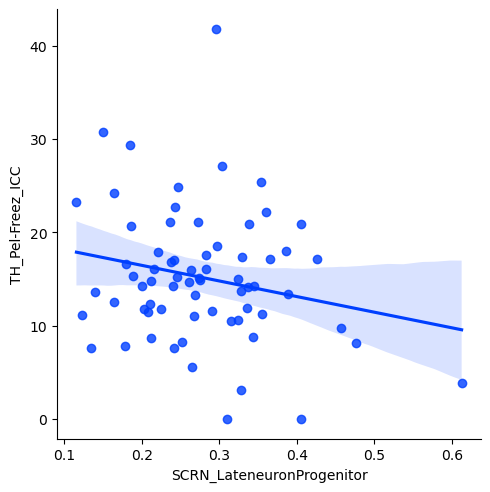

Neuroepithelial-likeCells
LinregressResult(slope=-58.986729587438184, intercept=16.543152450235567, rvalue=-0.12076273911909491, pvalue=0.32660827208703747, stderr=59.68418661727985, intercept_stderr=1.6276218092166972)
R-squared: 0.015


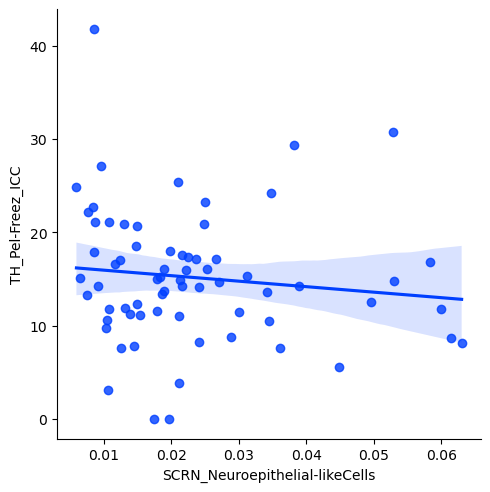

ProliferatingFloorPlateProgenitors
LinregressResult(slope=-52.02727069008218, intercept=17.469343042175453, rvalue=-0.10665155304818397, pvalue=0.3866883855702965, stderr=59.70459879226763, intercept_stderr=2.768140892937791)
R-squared: 0.011


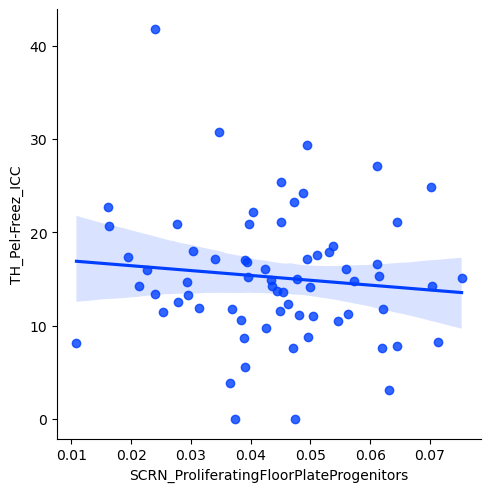

DAn
LinregressResult(slope=30.292413954774506, intercept=4.802083685910363, rvalue=0.4572590106240923, pvalue=8.853033331446317e-05, stderr=7.252109093058862, intercept_stderr=2.6000077076660957)
R-squared: 0.209


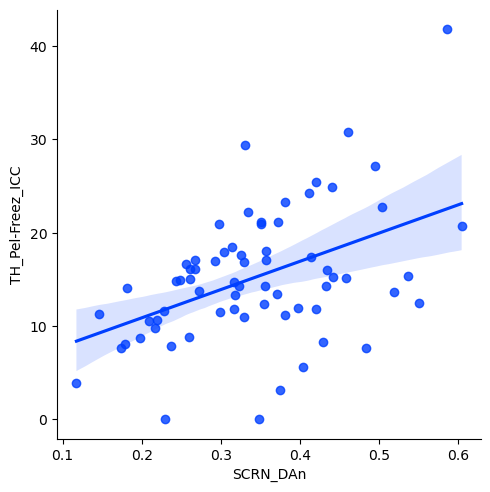

In [15]:
compare_ICC(merged, 'TH_Pel-Freez_ICC')

### compare SCRN fractions with MAP2 ICC values

/tmp/ipykernel_137185/763400554.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[icc_type].fillna(0, inplace=True)


DopaminergicNeurons
LinregressResult(slope=53.98090787351482, intercept=59.980943001997204, rvalue=0.3103771421031744, pvalue=0.00999677657402771, stderr=20.350845870045873, intercept_stderr=5.146311007749149)
R-squared: 0.096


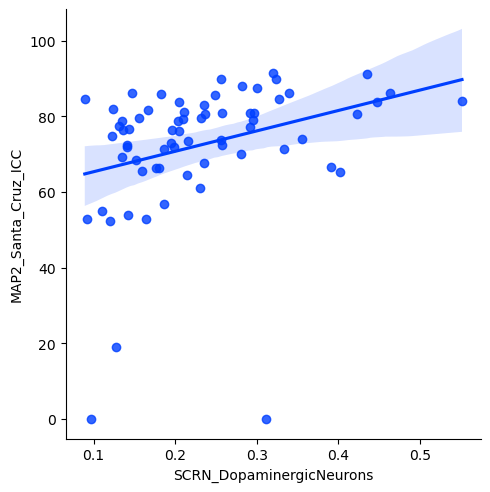

EarlyneuronProgenitor
LinregressResult(slope=28.978265513917602, intercept=63.84478332548631, rvalue=0.15795977333454295, pvalue=0.198263636660887, stderr=22.29805969173593, intercept_stderr=7.006115152256361)
R-squared: 0.025


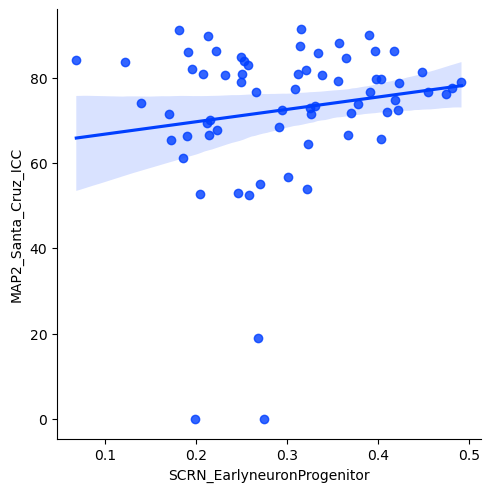

Ependymal-likeCells
LinregressResult(slope=-483.1807394698012, intercept=79.06229160183521, rvalue=-0.3823759596570051, pvalue=0.0012912209888905348, stderr=143.72166795142618, intercept_stderr=2.7665327483530553)
R-squared: 0.146


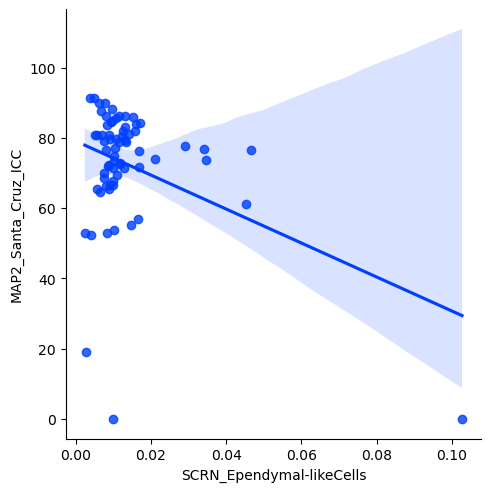

ImmatureDopaminergicNeurons
LinregressResult(slope=-27.22465174983306, intercept=75.52449127688982, rvalue=-0.14828191164219653, pvalue=0.22751736425025174, stderr=22.34983834106918, intercept_stderr=3.2384397340179225)
R-squared: 0.022


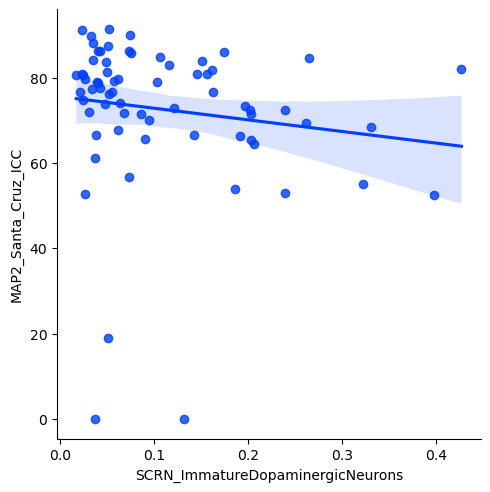

LateneuronProgenitor
LinregressResult(slope=-54.53126396441149, intercept=87.63840116867453, rvalue=-0.28362100083546843, pvalue=0.019088997785919576, stderr=22.694731085192767, intercept_stderr=6.611789965810438)
R-squared: 0.080


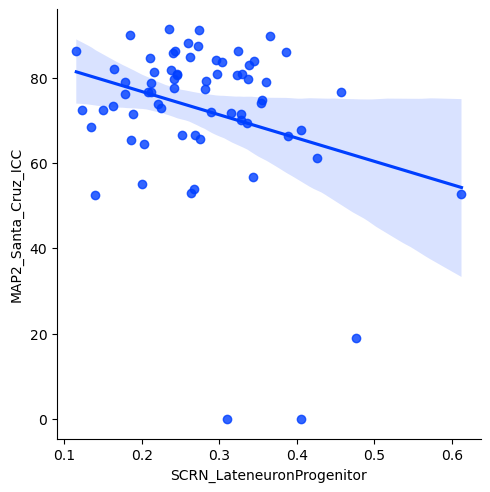

Neuroepithelial-likeCells
LinregressResult(slope=-247.82447818340947, intercept=78.27133408624915, rvalue=-0.2058766331389298, pvalue=0.0921192997008382, stderr=144.997529538975, intercept_stderr=3.9541653281382008)
R-squared: 0.042


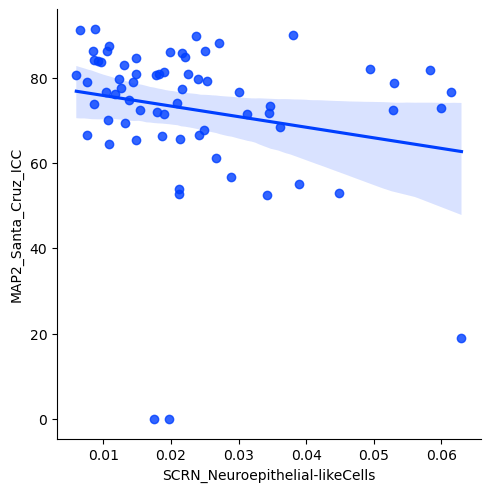

ProliferatingFloorPlateProgenitors
LinregressResult(slope=160.09478898844193, intercept=65.47394014718482, rvalue=0.133167288310919, pvalue=0.27898738687348196, stderr=146.66359713945747, intercept_stderr=6.799903340103604)
R-squared: 0.018


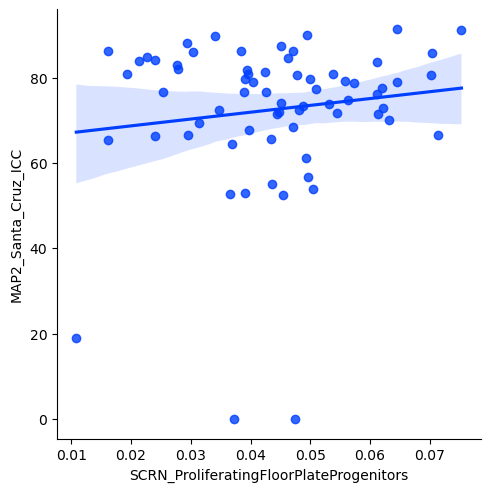

DAn
LinregressResult(slope=26.040646308978506, intercept=63.61114792481265, rvalue=0.1595013518427315, pvalue=0.19386420330170817, stderr=19.838990166670982, intercept_stderr=7.112624297809604)
R-squared: 0.025


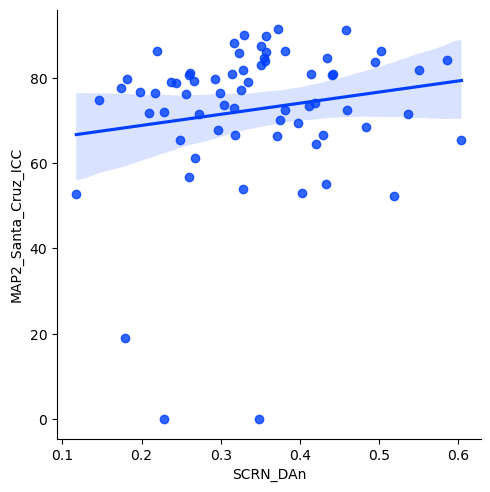

In [16]:
compare_ICC(merged, 'MAP2_Santa_Cruz_ICC')

### compare SCADEN estimated fractions with TH ICC values

In [17]:
def compare_scaden(df: DataFrame, icc_type: str):
    df[icc_type].fillna(0, inplace=True)
    for cell_type in cell_types:
        print(cell_type)
        results = linregress(df[cell_type], df[icc_type])
        print(results)
        print(f'R-squared: {results.rvalue**2:.3f}')    
        with rc_context({'figure.figsize': (9, 9), 'figure.dpi': dpi_value}):
            plt.style.use('seaborn-v0_8-bright')
            lmplot(data=df, x=cell_type, y=icc_type)
            plt.show()    

/tmp/ipykernel_137185/2882619921.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[icc_type].fillna(0, inplace=True)


DopaminergicNeurons
LinregressResult(slope=3.8058368169569348, intercept=13.911478098561128, rvalue=0.10880794351392163, pvalue=0.37710408539341267, stderr=4.279878211374176, intercept_stderr=1.662112664849428)
R-squared: 0.012


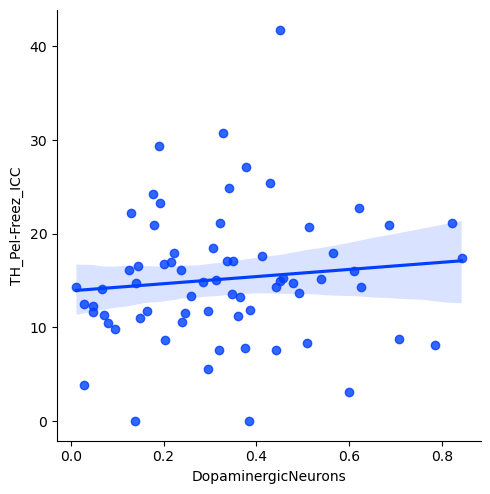

EarlyneuronProgenitor
LinregressResult(slope=-5.217564028111203, intercept=16.026686643038435, rvalue=-0.09614726436233374, pvalue=0.43541396093236506, stderr=6.648783294803855, intercept_stderr=1.3837380331939606)
R-squared: 0.009


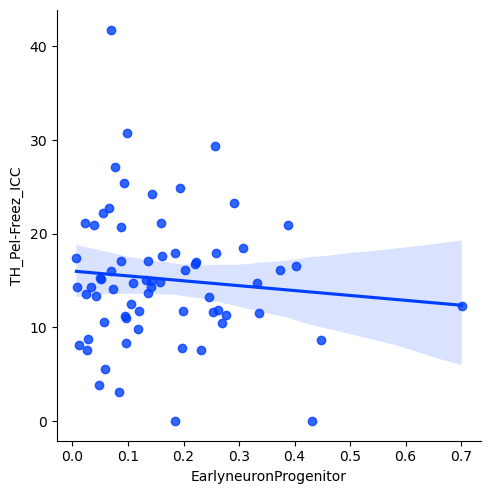

Ependymal-likeCells
LinregressResult(slope=60.567473248593785, intercept=14.198253581451532, rvalue=0.06353032628073146, pvalue=0.6067681360418962, stderr=117.1138344783385, intercept_stderr=2.079067727963035)
R-squared: 0.004


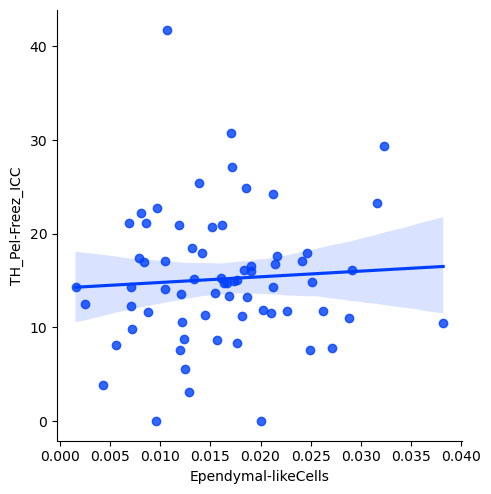

ImmatureDopaminergicNeurons
LinregressResult(slope=-3.64673915483075, intercept=15.70180729164807, rvalue=-0.05989218318203173, pvalue=0.6275607349090369, stderr=7.481389478706788, intercept_stderr=1.3808171739548036)
R-squared: 0.004


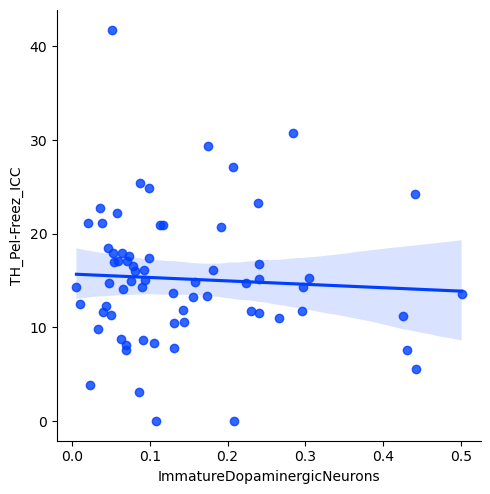

LateneuronProgenitor
LinregressResult(slope=-1.529116007617023, intercept=15.505406301150881, rvalue=-0.0399699290176277, pvalue=0.7462264257051737, stderr=4.705306293049397, intercept_stderr=1.3308362645491263)
R-squared: 0.002


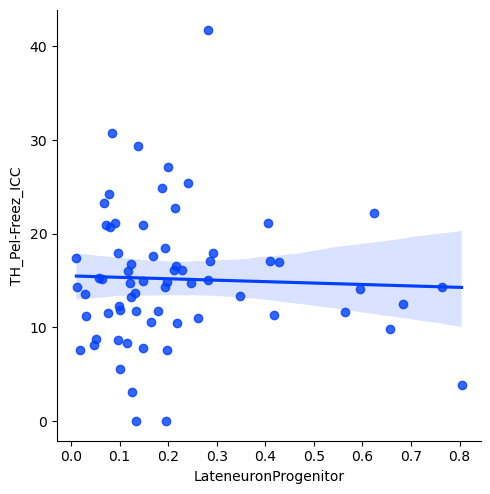

Neuroepithelial-likeCells
LinregressResult(slope=24.47852395613495, intercept=13.188721578316834, rvalue=0.13841699653377476, pvalue=0.26029977457877634, stderr=21.558725578472394, intercept_stderr=1.9489117600957557)
R-squared: 0.019


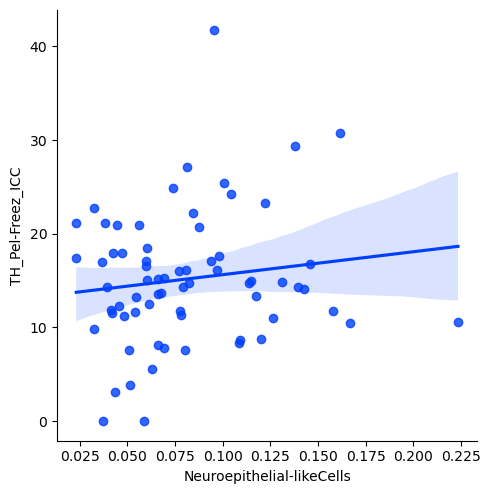

ProliferatingFloorPlateProgenitors
LinregressResult(slope=-10.576652145390767, intercept=15.685619132848316, rvalue=-0.04112932446668426, pvalue=0.7391236635209049, stderr=31.62692982466542, intercept_stderr=1.750573265867953)
R-squared: 0.002


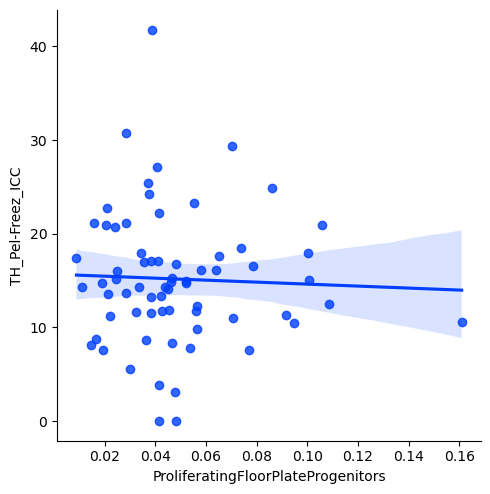

DAn
LinregressResult(slope=1.975210902729302, intercept=14.235403512751283, rvalue=0.06481957600305584, pvalue=0.5994727382929776, stderr=3.743010431424373, intercept_stderr=1.98113088894588)
R-squared: 0.004


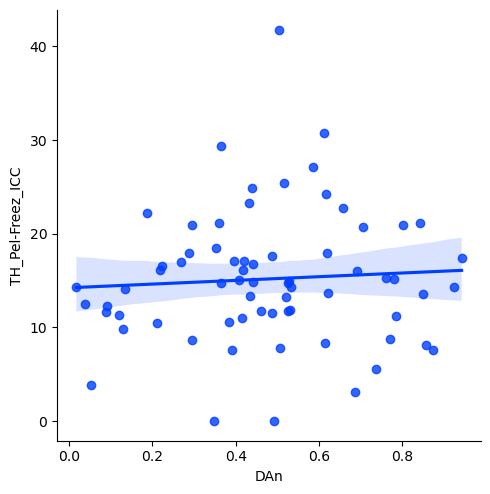

In [18]:
compare_scaden(merged, 'TH_Pel-Freez_ICC')

### compare SCADEN estimated fractions with MAP2 ICC values

/tmp/ipykernel_137185/2882619921.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[icc_type].fillna(0, inplace=True)


DopaminergicNeurons
LinregressResult(slope=-7.679233342716952, intercept=75.0818523900398, rvalue=-0.08908662852167129, pvalue=0.470020560777766, stderr=10.568251130658911, intercept_stderr=4.104234555762633)
R-squared: 0.008


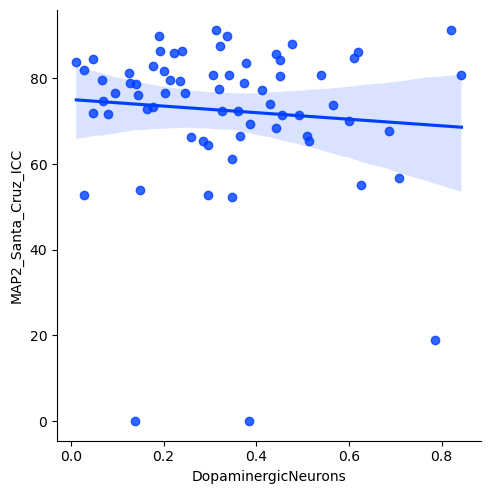

EarlyneuronProgenitor
LinregressResult(slope=6.538395929988846, intercept=71.46396260828251, rvalue=0.04889051141975678, pvalue=0.6921612039011784, stderr=16.442013599641943, intercept_stderr=3.42189518763494)
R-squared: 0.002


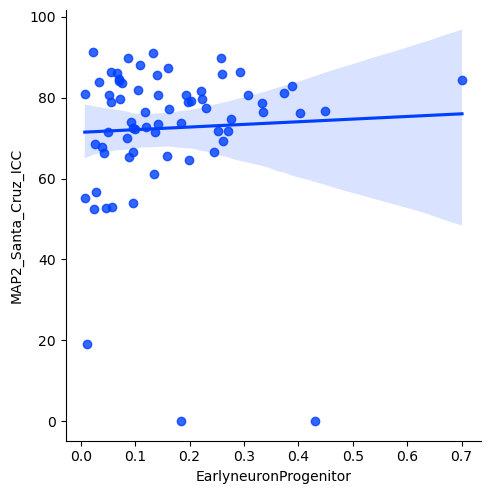

Ependymal-likeCells
LinregressResult(slope=163.78395383256472, intercept=69.88415944553272, rvalue=0.06971033995103168, pvalue=0.5721577422262394, stderr=288.4990427159088, intercept_stderr=5.121590048952042)
R-squared: 0.005


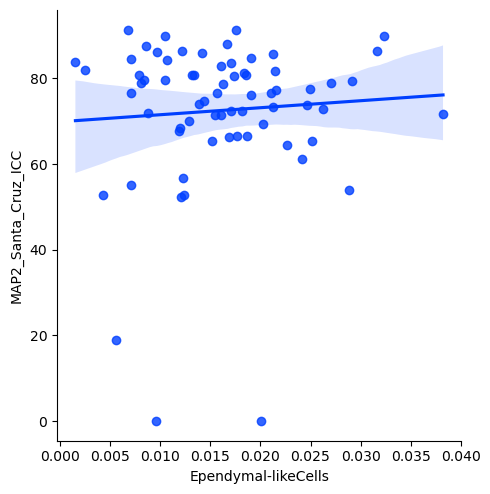

ImmatureDopaminergicNeurons
LinregressResult(slope=-34.83610100220176, intercept=77.54778069191822, rvalue=-0.23215562198163303, pvalue=0.056776428836008724, stderr=17.965849363217917, intercept_stderr=3.315901867697501)
R-squared: 0.054


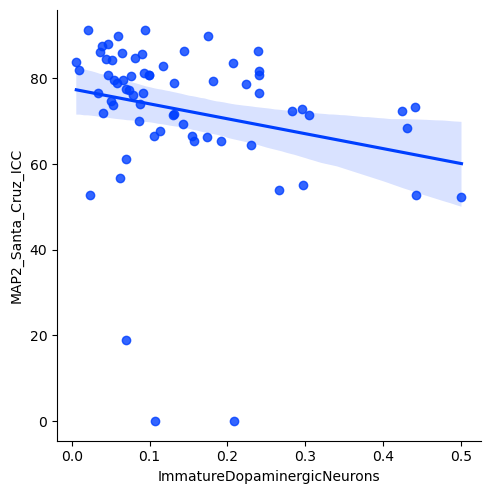

LateneuronProgenitor
LinregressResult(slope=13.642199721957207, intercept=69.5947706590438, rvalue=0.14469767919874307, pvalue=0.23907832265161888, stderr=11.483019343115464, intercept_stderr=3.247826521072921)
R-squared: 0.021


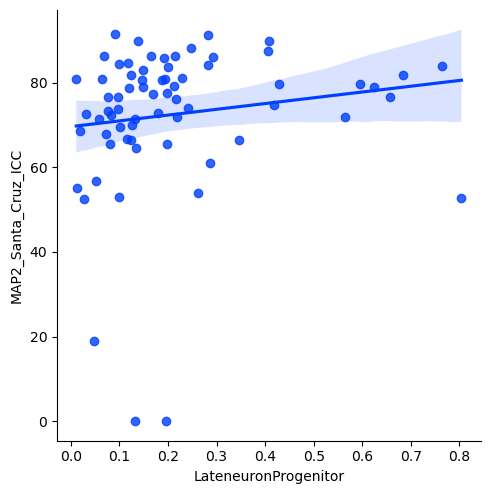

Neuroepithelial-likeCells
LinregressResult(slope=53.431245553357996, intercept=68.1905919225569, rvalue=0.12259809252657305, pvalue=0.31925499400703794, stderr=53.24159462594945, intercept_stderr=4.8130474834921255)
R-squared: 0.015


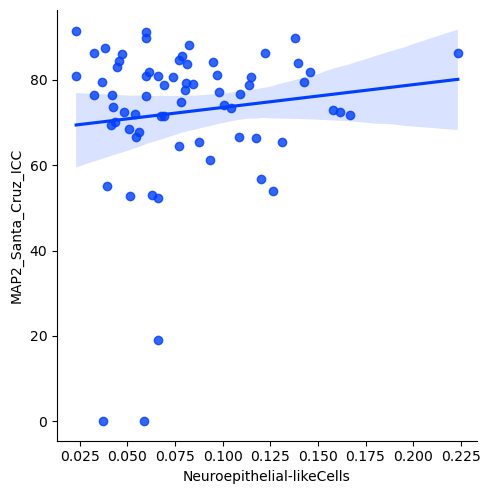

ProliferatingFloorPlateProgenitors
LinregressResult(slope=148.3327051800989, intercept=65.38883647464374, rvalue=0.23405854041570892, pvalue=0.05472037162290852, stderr=75.841362561404, intercept_stderr=4.197873852537219)
R-squared: 0.055


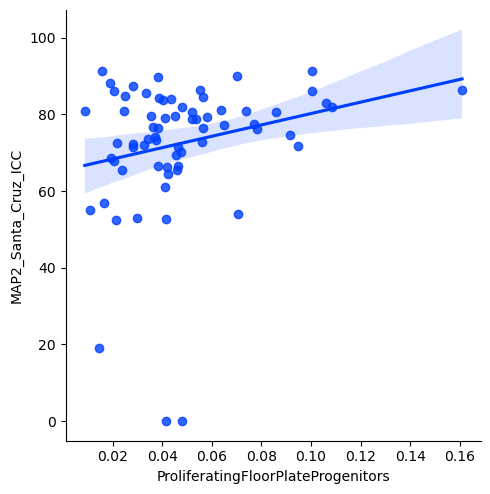

DAn
LinregressResult(slope=-14.553645539499136, intercept=79.46333291032258, rvalue=-0.19379774752858775, pvalue=0.11330258870971657, stderr=9.068563150798745, intercept_stderr=4.799882582632009)
R-squared: 0.038


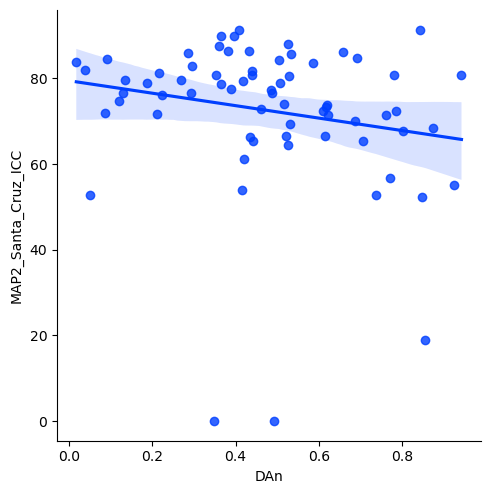

In [19]:
compare_scaden(merged, 'MAP2_Santa_Cruz_ICC')

In [20]:
!date

Wed Oct 16 08:13:04 PM UTC 2024
